In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from orbit.utils.dataset import load_iclaims
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data

# Load sample data
data = load_iclaims()
data["week"] = pd.to_datetime(data["week"])
data = data.rename(columns={"week": "date", "claims": "value"})

# Split the data into train and test sets (using the last 52 weeks as test set)
train_size = len(data) - 52  # Reserve last 52 weeks for testing
train_df = data.iloc[:train_size]
test_df = data.iloc[train_size:]

# Initialize the DLT model
model = DLT(
    response_col="value",
    date_col="date",
    seasonality=52,  # Weekly seasonality
)

# Fit the model on training data
model.fit(df=train_df)

# Make predictions on both training and test sets
predictions = model.predict(df=data)

# Plot the predicted data
plot_predicted_data(
    df=data,  # original data
    predicted_df=predictions,  # predictions
    date_col="date",
    actual_col="value",
    pred_col="prediction"
)

# Calculate metrics for test set
from orbit.diagnostics.metrics import smape, rmse

test_predictions = predictions.iloc[train_size:]
test_actual = test_df['value']

print("\nTest Set Metrics:")
print("SMAPE:", smape(test_actual, test_predictions['prediction']))
print("RMSE:", rmse(test_actual, test_predictions['prediction']))

# To show the prediction intervals
print("\nPrediction Intervals:")
print(predictions[["prediction", "prediction_5", "prediction_95"]].head())


2025-01-31 20:41:43 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

TypeError: plot_predicted_data() got an unexpected keyword argument 'df'

2025-01-31 20:42:59 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

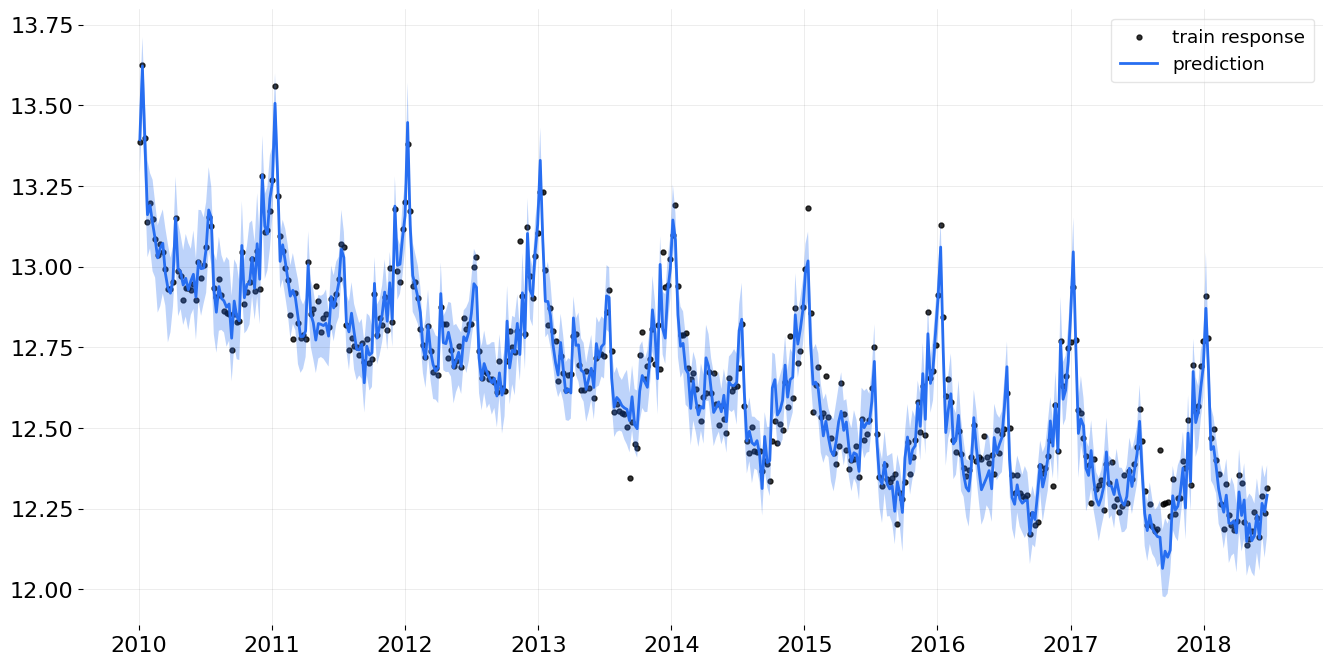

ImportError: cannot import name 'rmse' from 'orbit.diagnostics.metrics' (/usr/local/lib/python3.11/dist-packages/orbit/diagnostics/metrics.py)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from orbit.utils.dataset import load_iclaims
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data

# Load sample data
data = load_iclaims()
data["week"] = pd.to_datetime(data["week"])
data = data.rename(columns={"week": "date", "claims": "value"})

# Split the data into train and test sets (using the last 52 weeks as test set)
train_size = len(data) - 52  # Reserve last 52 weeks for testing
train_df = data.iloc[:train_size]
test_df = data.iloc[train_size:]

# Initialize the DLT model
model = DLT(
    response_col="value",
    date_col="date",
    seasonality=52,  # Weekly seasonality
)

# Fit the model on training data
model.fit(df=train_df)

# Make predictions on both training and test sets
predictions = model.predict(df=data)

# Plot the predicted data
plot_predicted_data(data, predictions, "date", "value", "prediction")

# Calculate metrics for test set
from orbit.diagnostics.metrics import smape, rmse

test_predictions = predictions.iloc[train_size:]
test_actual = test_df['value']

print("\nTest Set Metrics:")
print("SMAPE:", smape(test_actual, test_predictions['prediction']))
print("RMSE:", rmse(test_actual, test_predictions['prediction']))

# To show the prediction intervals
print("\nPrediction Intervals:")
print(predictions[["prediction", "prediction_5", "prediction_95"]].head())

# Optional: Create a manual plot if the above doesn't work
plt.figure(figsize=(15, 7))
plt.plot(data['date'], data['value'], label='Actual', alpha=0.5)
plt.plot(predictions['date'], predictions['prediction'], label='Predicted', color='red')
plt.fill_between(predictions['date'],
                 predictions['prediction_5'],
                 predictions['prediction_95'],
                 color='red',
                 alpha=0.1)
plt.axvline(x=train_df['date'].iloc[-1], color='black', linestyle='--', label='Train/Test Split')
plt.legend()
plt.title('Time Series Forecast')
plt.show()


2025-01-31 20:44:02 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

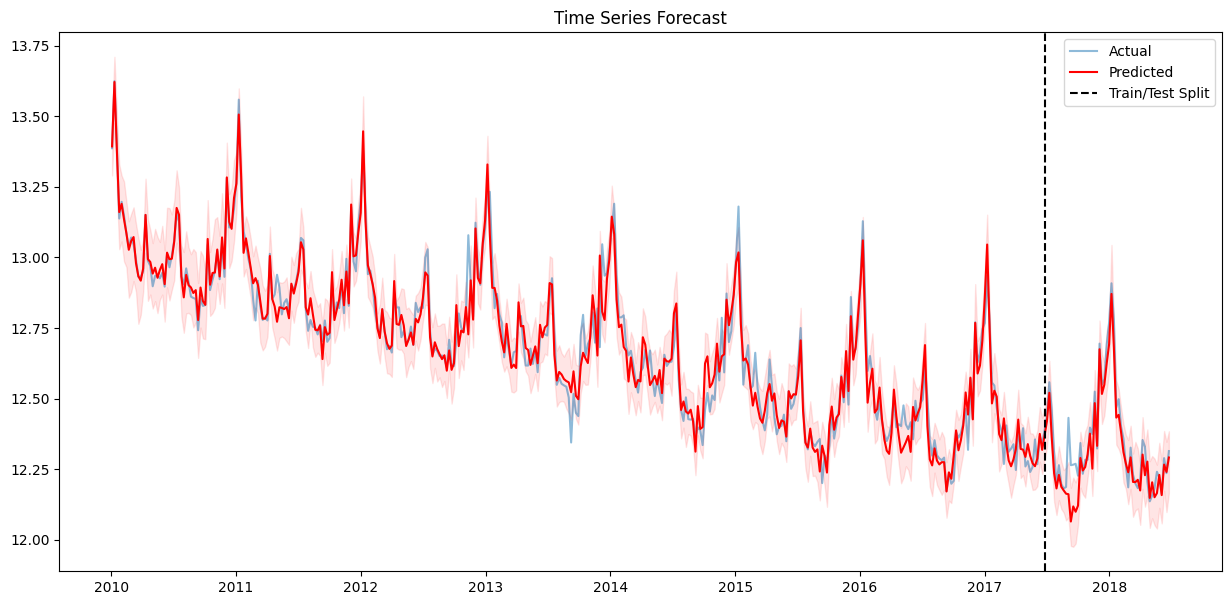


Test Set Metrics:
SMAPE: 0.00415634162573216
RMSE: 0.07322381616151324

Prediction Intervals:
   prediction  prediction_5  prediction_95
0   13.393031     13.290292      13.494477
1   13.621059     13.476549      13.710458
2   13.381963     13.244189      13.507667
3   13.160608     13.028900      13.329020
4   13.189533     13.056502      13.289496


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from orbit.utils.dataset import load_iclaims
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data
from orbit.diagnostics.metrics import smape

# Define our own RMSE function
def rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

# Load sample data
data = load_iclaims()
data["week"] = pd.to_datetime(data["week"])
data = data.rename(columns={"week": "date", "claims": "value"})

# Split the data into train and test sets (using the last 52 weeks as test set)
train_size = len(data) - 52  # Reserve last 52 weeks for testing
train_df = data.iloc[:train_size]
test_df = data.iloc[train_size:]

# Initialize the DLT model
model = DLT(
    response_col="value",
    date_col="date",
    seasonality=52,  # Weekly seasonality
)

# Fit the model on training data
model.fit(df=train_df)

# Make predictions on both training and test sets
predictions = model.predict(df=data)

# Create manual plot
plt.figure(figsize=(15, 7))
plt.plot(data['date'], data['value'], label='Actual', alpha=0.5)
plt.plot(predictions['date'], predictions['prediction'], label='Predicted', color='red')
plt.fill_between(predictions['date'],
                 predictions['prediction_5'],
                 predictions['prediction_95'],
                 color='red',
                 alpha=0.1)
plt.axvline(x=train_df['date'].iloc[-1], color='black', linestyle='--', label='Train/Test Split')
plt.legend()
plt.title('Time Series Forecast')
plt.show()

# Calculate metrics for test set
test_predictions = predictions.iloc[train_size:]
test_actual = test_df['value']

print("\nTest Set Metrics:")
print("SMAPE:", smape(test_actual, test_predictions['prediction']))
print("RMSE:", rmse(test_actual, test_predictions['prediction']))

# To show the prediction intervals
print("\nPrediction Intervals:")
print(predictions[["prediction", "prediction_5", "prediction_95"]].head())


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from orbit.utils.dataset import load_iclaims
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data
from orbit.diagnostics.metrics import smape

# Define our own RMSE function
def rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

# Load sample data
data = pd.read_csv("SN_m_tot_V2.0.csv")
data["Month"] = pd.to_datetime(data["Month"])
data = data.rename(columns={"Month": "date", "Monthly mean total sunspot number": "value"})

# Split the data into train and test sets (using the last 48 months as test set)
train_size = len(data) - 48  # Reserve last 48 months for testing
train_df = data.iloc[:train_size]
test_df = data.iloc[train_size:]

# Initialize the DLT model
model = DLT(
    response_col="value",
    date_col="date",
    seasonality=12,
)

# Fit the model on training data
model.fit(df=train_df)

# Make predictions on both training and test sets
predictions = model.predict(df=data)

# Create manual plot
plt.figure(figsize=(15, 7))
plt.plot(data['date'], data['value'], label='Actual', alpha=0.5)
plt.plot(predictions['date'], predictions['prediction'], label='Predicted', color='red')
plt.fill_between(predictions['date'],
                 predictions['prediction_5'],
                 predictions['prediction_95'],
                 color='red',
                 alpha=0.1)
plt.axvline(x=train_df['date'].iloc[-1], color='black', linestyle='--', label='Train/Test Split')
plt.legend()
plt.title('Sunspot Forecast')
plt.savefig("timeseries.png")
plt.show()

# Calculate metrics for test set
test_predictions = predictions.iloc[train_size:]
test_actual = test_df['value']

print("\nTest Set Metrics:")
print("SMAPE:", smape(test_actual, test_predictions['prediction']))
print("RMSE:", rmse(test_actual, test_predictions['prediction']))

# To show the prediction intervals
print("\nPrediction Intervals:")
print(predictions[["prediction", "prediction_5", "prediction_95"]].head())


ValueError: cannot assemble with duplicate keys

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from orbit.utils.dataset import load_iclaims
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data
from orbit.diagnostics.metrics import smape

def rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

# Load sample data
data = pd.read_csv("monthly-sunspots.csv")
data["Month"] = pd.to_datetime(data["Month"])
data = data.rename(columns={"Month": "date", "Sunspots": "value"})

# Split the data into train and test sets
train_size = len(data) - 52
train_df = data.iloc[:train_size]
test_df = data.iloc[train_size:]

# Initialize lists to store predictions
all_predictions = []
dates = test_df['date'].tolist()
actual_values = test_df['value'].tolist()

# Step-by-step prediction
window_size = 12  # Number of steps to predict at once
step_size = 6    # Number of steps to move forward

for i in range(0, len(test_df), step_size):
    # Get current training data
    current_train = pd.concat([train_df, data.iloc[train_size:train_size+i]])

    # Initialize and fit the model
    model = DLT(
        response_col="value",
        date_col="date",
        seasonality=12,  # Monthly seasonality for sunspots
        global_trend_option='linear'  # Add linear trend
    )

    model.fit(df=current_train)

    # Predict next window_size steps
    future_df = data.iloc[train_size+i:min(train_size+i+window_size, len(data))]
    pred = model.predict(df=future_df)

    all_predictions.extend(pred['prediction'].tolist()[:step_size])

# Trim predictions to match test set length
all_predictions = all_predictions[:len(test_df)]

# Create final predictions dataframe
final_predictions = pd.DataFrame({
    'date': test_df['date'],
    'prediction': all_predictions,
    'actual': test_df['value']
})

# Plot results
plt.figure(figsize=(15, 7))
plt.plot(data['date'], data['value'], label='Actual', alpha=0.5)
plt.plot(train_df['date'], train_df['value'], label='Training Data', color='blue')
plt.plot(final_predictions['date'], final_predictions['prediction'], label='Predicted', color='red')
plt.axvline(x=train_df['date'].iloc[-1], color='black', linestyle='--', label='Train/Test Split')
plt.legend()
plt.title('Sunspots Forecast - Rolling Prediction')
plt.show()

# Calculate metrics
print("\nTest Set Metrics:")
print("SMAPE:", smape(final_predictions['actual'], final_predictions['prediction']))
print("RMSE:", rmse(final_predictions['actual'], final_predictions['prediction']))

# Print some statistics
print("\nPrediction Summary:")
print(final_predictions.describe())


2025-01-31 20:57:38 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-01-31 21:04:42 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-01-31 21:11:22 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-01-31 21:18:35 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv("monthly-sunspots.csv")
df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [ ]:
!pip install orbit-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.9/446.9 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 M

Orbit for Bayesian Time Series Forecasting in Python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from orbit.utils.dataset import load_iclaims
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data
from orbit.diagnostics.metrics import smape
from prophet import Prophet

# Define RMSE function
def rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

# Load sample data
data = pd.read_csv("SN_m_tot_V2.0.csv")
data["Month"] = pd.to_datetime(data["Month"])
data = data.rename(columns={"Month": "date", "Monthly mean total sunspot number": "value"})

# Split the data
train_size = len(data) - 48
train_df = data.iloc[:train_size]
test_df = data.iloc[train_size:]

# --- Orbit Model ---
model_orbit = DLT(
    response_col="value",
    date_col="date",
    seasonality=12,
)

# Fit Orbit model
model_orbit.fit(df=train_df)
predictions_orbit = model_orbit.predict(df=data)

# --- Prophet Model ---
# Prepare data for Prophet (requires 'ds' and 'y' columns)
prophet_data = data.rename(columns={'date': 'ds', 'value': 'y'})
prophet_train = prophet_data.iloc[:train_size]

# Initialize and fit Prophet model
model_prophet = Prophet(yearly_seasonality=True)
model_prophet.fit(prophet_train)

# Make predictions with Prophet
future = prophet_data[['ds']]
predictions_prophet = model_prophet.predict(future)

# Create subplot for both models
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot Orbit results
ax1.plot(data['date'], data['value'], label='Actual', alpha=0.5)
ax1.plot(predictions_orbit['date'], predictions_orbit['prediction'], label='Predicted', color='red')
ax1.fill_between(predictions_orbit['date'],
                predictions_orbit['prediction_5'],
                predictions_orbit['prediction_95'],
                color='red',
                alpha=0.1)
ax1.axvline(x=train_df['date'].iloc[-1], color='black', linestyle='--', label='Train/Test Split')
ax1.legend()
ax1.set_title('Orbit Model Forecast')

# Plot Prophet results
ax2.plot(data['date'], data['value'], label='Actual', alpha=0.5)
ax2.plot(predictions_prophet['ds'], predictions_prophet['yhat'], label='Predicted', color='green')
ax2.fill_between(predictions_prophet['ds'],
                predictions_prophet['yhat_lower'],
                predictions_prophet['yhat_upper'],
                color='green',
                alpha=0.1)
ax2.axvline(x=train_df['date'].iloc[-1], color='black', linestyle='--', label='Train/Test Split')
ax2.legend()
ax2.set_title('Prophet Model Forecast')

plt.tight_layout()
plt.savefig("timeseries_comparison.png")
plt.show()

# Calculate metrics for test set - Orbit
test_predictions_orbit = predictions_orbit.iloc[train_size:]
test_actual = test_df['value']

print("\nOrbit Test Set Metrics:")
print("SMAPE:", smape(test_actual, test_predictions_orbit['prediction']))
print("RMSE:", rmse(test_actual, test_predictions_orbit['prediction']))

# Calculate metrics for test set - Prophet
test_predictions_prophet = predictions_prophet.iloc[train_size:]
print("\nProphet Test Set Metrics:")
print("SMAPE:", smape(test_actual, test_predictions_prophet['yhat']))
print("RMSE:", rmse(test_actual, test_predictions_prophet['yhat']))

# Show prediction intervals for both models
print("\nOrbit Prediction Intervals:")
print(predictions_orbit[["prediction", "prediction_5", "prediction_95"]].head())

print("\nProphet Prediction Intervals:")
print(predictions_prophet[["yhat", "yhat_lower", "yhat_upper"]].head())


ForecasterException: DataFrame does not contain `response_col`: value

2025-01-31 21:37:19 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


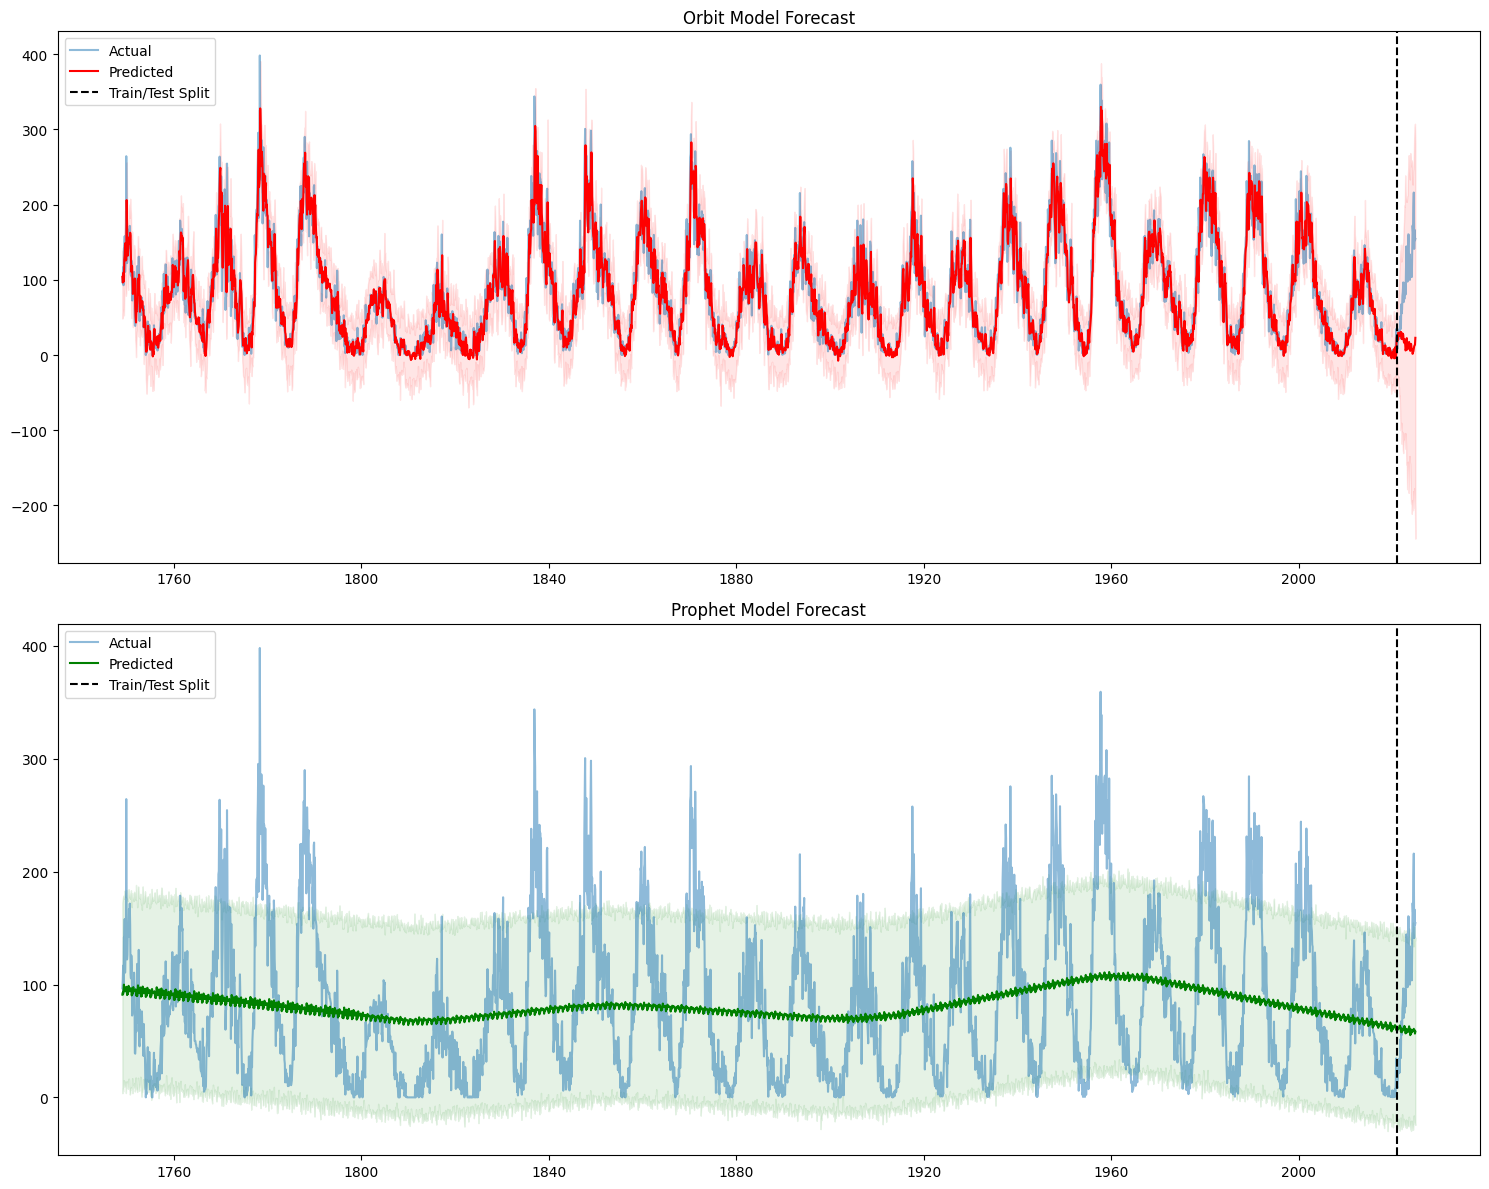


Orbit Test Set Metrics:
SMAPE: 1.2577330909302515
RMSE: 99.90859640412387

Prophet Test Set Metrics:
SMAPE: 0.6695273556170346
RMSE: 64.91185978677316

Orbit Prediction Intervals:
   prediction  prediction_5  prediction_95
0  103.905899     48.497494     138.714511
1   96.416935     49.631424     130.954914
2   97.210462     56.670924     141.141208
3  109.749628     60.285487     146.532735
4   97.870430     52.826603     145.627069

Prophet Prediction Intervals:
        yhat  yhat_lower  yhat_upper
0  91.040613    3.648401  172.724892
1  92.902714    8.363987  175.489540
2  91.417559    5.168353  177.922106
3  94.874264   15.258852  178.914118
4  99.884361   11.642489  175.889742


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from orbit.utils.dataset import load_iclaims
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data
from orbit.diagnostics.metrics import smape
from prophet import Prophet

# Define RMSE function
def rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

# Load sample data
data = pd.read_csv("SN_m_tot_V2.0.csv")
data["Month"] = pd.to_datetime(data["Month"])

# Create separate dataframes for Orbit and Prophet with correct column names
orbit_data = data.copy()
prophet_data = data.copy()

# Rename columns for Orbit
orbit_data = orbit_data.rename(columns={
    "Month": "date",
    "Sunspot": "response"  # Changed from "value" to "response"
})

# Rename columns for Prophet
prophet_data = prophet_data.rename(columns={
    "Month": "ds",
    "Sunspot": "y"
})

# Split the data
train_size = len(data) - 48

# Orbit train/test split
orbit_train = orbit_data.iloc[:train_size]
orbit_test = orbit_data.iloc[train_size:]

# Prophet train/test split
prophet_train = prophet_data.iloc[:train_size]
prophet_test = prophet_data.iloc[train_size:]

# --- Orbit Model ---
model_orbit = DLT(
    response_col="response",  # Changed from "value" to "response"
    date_col="date",
    seasonality=12,
)

# Fit Orbit model
model_orbit.fit(df=orbit_train)
predictions_orbit = model_orbit.predict(df=orbit_data)

# --- Prophet Model ---
# Initialize and fit Prophet model
model_prophet = Prophet(yearly_seasonality=True)
model_prophet.fit(prophet_train)

# Make predictions with Prophet
future = prophet_data[['ds']]
predictions_prophet = model_prophet.predict(future)

# Create subplot for both models
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot Orbit results
ax1.plot(orbit_data['date'], orbit_data['response'], label='Actual', alpha=0.5)
ax1.plot(predictions_orbit['date'], predictions_orbit['prediction'], label='Predicted', color='red')
ax1.fill_between(predictions_orbit['date'],
                predictions_orbit['prediction_5'],
                predictions_orbit['prediction_95'],
                color='red',
                alpha=0.1)
ax1.axvline(x=orbit_train['date'].iloc[-1], color='black', linestyle='--', label='Train/Test Split')
ax1.legend()
ax1.set_title('Orbit Model Forecast')

# Plot Prophet results
ax2.plot(prophet_data['ds'], prophet_data['y'], label='Actual', alpha=0.5)
ax2.plot(predictions_prophet['ds'], predictions_prophet['yhat'], label='Predicted', color='green')
ax2.fill_between(predictions_prophet['ds'],
                predictions_prophet['yhat_lower'],
                predictions_prophet['yhat_upper'],
                color='green',
                alpha=0.1)
ax2.axvline(x=prophet_train['ds'].iloc[-1], color='black', linestyle='--', label='Train/Test Split')
ax2.legend()
ax2.set_title('Prophet Model Forecast')

plt.tight_layout()
plt.savefig("timeseries_comparison.png")
plt.show()

# Calculate metrics for test set - Orbit
test_predictions_orbit = predictions_orbit.iloc[train_size:]
test_actual = orbit_test['response']

print("\nOrbit Test Set Metrics:")
print("SMAPE:", smape(test_actual, test_predictions_orbit['prediction']))
print("RMSE:", rmse(test_actual, test_predictions_orbit['prediction']))

# Calculate metrics for test set - Prophet
test_predictions_prophet = predictions_prophet.iloc[train_size:]
print("\nProphet Test Set Metrics:")
print("SMAPE:", smape(test_actual, test_predictions_prophet['yhat']))
print("RMSE:", rmse(test_actual, test_predictions_prophet['yhat']))

# Show prediction intervals for both models
print("\nOrbit Prediction Intervals:")
print(predictions_orbit[["prediction", "prediction_5", "prediction_95"]].head())

print("\nProphet Prediction Intervals:")
print(predictions_prophet[["yhat", "yhat_lower", "yhat_upper"]].head())
